# Intern Project: Creating Insight From Textual Response Data
### Max Steffey, Spring 2023

About the current __test__ dataset: Contains a CSV file of user reviews for a new Harry Potter video game. The actual text version of the review (i.e. what the user has to say) is in one column of this file. To perform essential functions, isolate that column, and proceed.

With Egg data, a similar process will occur -- many of these functions will not change.

In [ ]:
## importing libraries
import pandas as pd
import numpy as np
import os
from nltk.classify.scikitlearn import SklearnClassifier
from nltk.classify import ClassifierI
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import nltk

## import text files that contain common positive and negative words
tmp_pos = open('/Users/maxsteffey/Downloads/positive-words.txt', encoding='latin-1')
tmp_neg = open('/Users/maxsteffey/Downloads/negative-words.txt', encoding='latin-1')
pos = tmp_pos.read()
neg = tmp_neg.read()

## split text into a set for later matching
pw = set(pos.split())
nw = set(neg.split())
tmp_pos.close()
tmp_neg.close()

In [ ]:
## importing dataset
df = pd.read_csv('/Users/maxsteffey/Downloads/hogwarts_legacy_reviews.csv', index_col=[0])

In [3]:
## function that contains common preprocessing steps. removes stopwords like "a", "the", "it", etc.
def preprocessing(raw_text):
    import nltk
    nltk.download('stopwords')
    from nltk.corpus import stopwords 
    import regex as re
    
    ## convert to lowercase
    lower_text = raw_text.lower()
    
    ## remove punctuation, non-english chars, etc.
    letters_only = re.sub("[^a-z]",
                          " ",     
                          lower_text)
     
    ## removes stopwords like "a", "the", "it", etc.
    sw = stopwords.words('english')
    tmp = letters_only.split()
    tmp_ar = [w for w in tmp if w not in sw]
    tmp_o = ' '.join(tmp_ar)
    return tmp_o

In [4]:
## subsetting data to remove feedback column and trim to 1000 rows
data = df.drop(['Feedback'], axis=1)
data = df.iloc[0:1000, :]

In [5]:
## appending all review data to one huge string
text = data['Review']
string = ''
for i in text:
    string += str(i)

In [6]:
## preprocessing data
final_df = preprocessing(string)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/maxsteffey/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
## recieves some abritrary text, calculates sentiment score by matching words to words in pw and nw
def gen_senti(text):
    import re
    clean_text = re.sub("[^A-Za-z']+"," ",text).lower().strip().replace("  ", " ") ## making text readable
    
    ## initialize counts
    pc = 0
    nc = 0
    total = 0
    
    ## split the cleaned text
    tmp = set(clean_text.split())
    
    ## iterate through tmp and edit counts accordingly
    for i in tmp:
        if i in pw:
            pc = pc + 1
            total = total + 1
        elif i in nw:
            nc = nc - 1
            total = total + 1
    
    ## see counts
    print(pc)
    print(nc)
            
    ## check on zeroDivError
    if total == 0:
        return 0
    
    ## calculate sentiment score
    else:
        S = (str((pc + nc) / total))
        return S

In [9]:
## this game has a slightly negative sentiment score!
gen_senti(final_df)

223
-275


'-0.10441767068273092'

In [10]:
## create dictionary of most used words in df
words = final_df.split(' ')
all_words = nltk.FreqDist(words)
mostCommon = all_words.most_common(15)
mostCommon

[('game', 658),
 ('good', 128),
 ('like', 116),
 ('potter', 106),
 ('world', 105),
 ('fun', 104),
 ('harry', 102),
 ('great', 95),
 ('story', 79),
 ('really', 76),
 ('play', 71),
 ('time', 66),
 ('love', 64),
 ('amazing', 62),
 ('even', 60)]

In [11]:
## convert to dataframe
com_words = pd.DataFrame(mostCommon)
com_words.rename(columns = {0:'word'}, inplace = True)
com_words.rename(columns = {1:'count'}, inplace = True)
com_words

,word,count
0,game,658
1,good,128
2,like,116
3,potter,106
4,world,105
5,fun,104
6,harry,102
7,great,95
8,story,79
9,really,76


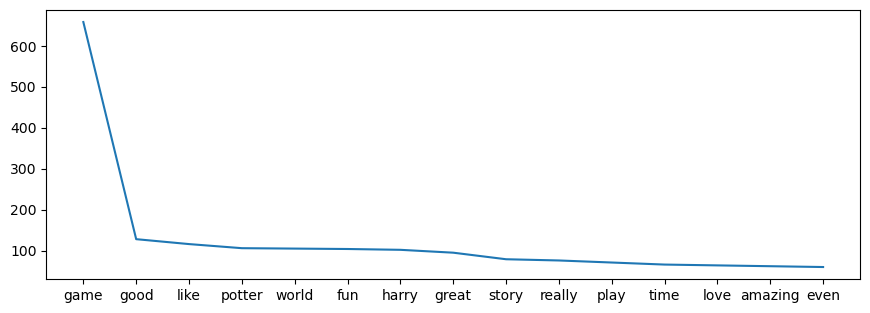

In [12]:
## create histogram to view
from matplotlib.pyplot import hist

plt.rcParams["figure.figsize"] = [10.50, 3.50]
plt.plot(com_words['word'], com_words['count'])
plt.show()

In [13]:
word_features = list(all_words.keys())[:1000]